In [1]:
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from pandas_datareader.famafrench import get_available_datasets
from datetime import datetime
import numpy as np

%matplotlib inline

# US CPI

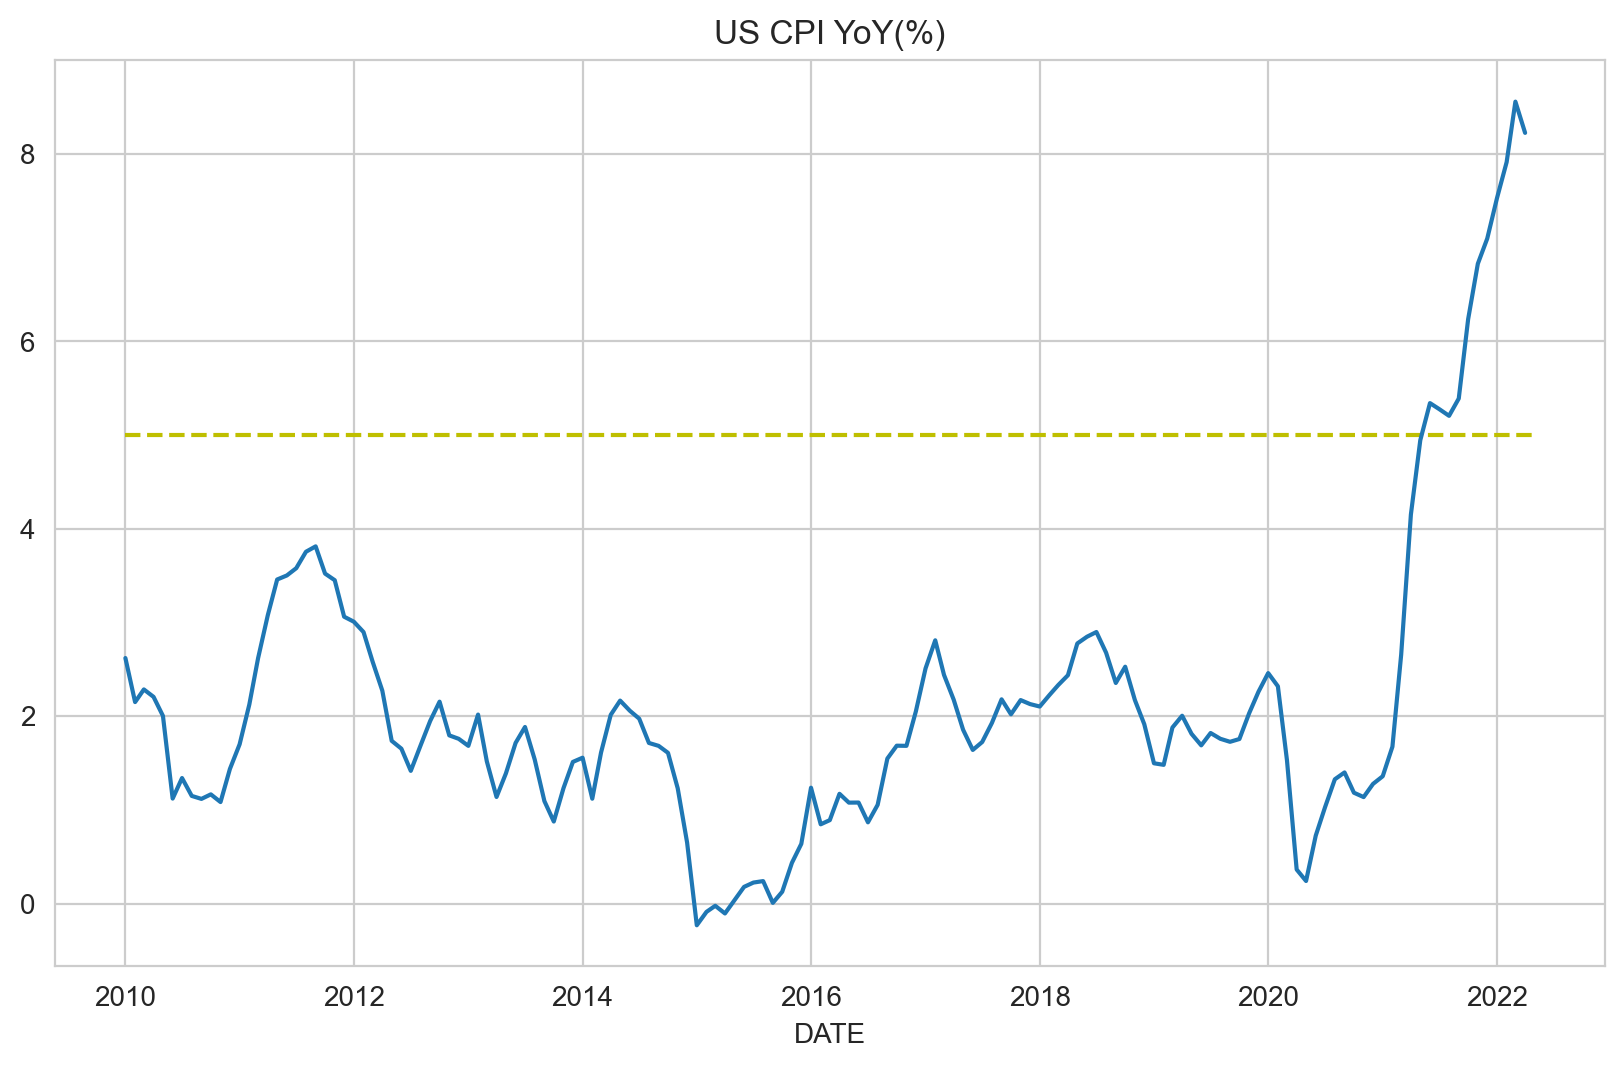

In [2]:
df = pdr.get_data_fred('CPIAUCSL', start='2009-1-1')
df = df.pct_change(12).dropna()*100

sns.set_style('whitegrid')
plt.figure(dpi=200, figsize=(10,6))
sns.lineplot(data=df, legend=False).set(title='US CPI YoY(%)')
plt.hlines(5, datetime(2010,1,1), datetime(2022,5,1), color='y', linestyles='dashed')

# CPI components

In [3]:
ticker = ['CUSR0000'] * 22
code = ['SAF111','SAF112','SEFJ','SAF113','SAF114','SAF115','SEFV','SAF116','SAH3','SAA','SETA01','SAM1','SAR','SAE','SACE','SEHF','SEGA','SAH1','SEHG','SAM2','SAS4','SAGS']
name = ['Cereals and bakery products','Meat, poultry, fish and eggs','Dairy','Fruit and veg','Soft drinks','Other food','Food outside home','Alcohol','Household goods and sevices','Apparel','New Vehicles','Medical goods','Recreation goods & services','Education goods & services','Energy products','Energy services','Tobacco products','Shelter','Water and sewerage','Medical services','Transport services','Personal goods and services']
# https://github.com/palewire/cpi/blob/master/docs/items.csv
# https://www.bls.gov/news.release/cpi.t02.htm#cpipress2.f.8

for i in range(len(ticker)):
    ticker[i] = str(ticker[i]) + str(code[i])
ticker[9] = 'CPIAPPSL'
ticker[12] = 'CPIRECSL'
ticker[13] = 'CPIEDUSL'
ticker[21] = 'CWUR0000SEGC'

cpi_comp = pdr.get_data_fred(ticker, start='2021-6-1')
cpi_comp.columns = name
cpi_comp.index = cpi_comp.index.strftime('%Y/%m')
cpi_comp

,Cereals and bakery products,"Meat, poultry, fish and eggs",Dairy,Fruit and veg,Soft drinks,Other food,Food outside home,Alcohol,Household goods and sevices,Apparel,...,Recreation goods & services,Education goods & services,Energy products,Energy services,Tobacco products,Shelter,Water and sewerage,Medical services,Transport services,Personal goods and services
DATE,,,,,,,,,,,,,,,,,,,,,
2021/06,286.422,280.737,231.414,315.980,180.155,219.968,305.634,262.929,130.705,121.580,...,124.911,142.433,263.716,216.692,1247.577,333.807,260.638,570.691,333.374,295.862
2021/07,288.649,284.309,232.559,313.920,181.263,221.300,308.023,263.748,130.724,121.647,...,125.609,142.637,270.055,218.176,1253.276,335.262,261.759,571.579,330.441,301.861
2021/08,288.638,286.541,230.662,315.056,182.741,222.227,309.336,264.539,132.316,121.956,...,126.202,142.920,276.734,220.730,1254.492,335.888,262.627,572.969,326.470,303.624
2021/09,291.888,291.902,231.973,317.299,184.570,224.995,310.996,264.931,133.582,121.105,...,126.384,143.433,280.047,223.334,1263.542,337.298,263.785,573.939,323.329,302.845
2021/10,294.893,296.235,232.545,317.390,185.895,227.702,313.592,264.603,134.667,121.850,...,127.306,143.631,293.342,228.797,1287.067,338.865,264.293,576.248,323.995,301.909
2021/11,296.917,299.222,233.165,320.699,186.416,230.549,315.481,265.002,135.808,122.760,...,127.061,143.660,305.653,229.272,1298.746,340.475,264.485,578.237,326.256,302.688
2021/12,297.693,299.689,234.628,322.419,187.511,231.493,317.372,265.701,137.301,124.117,...,126.913,143.748,309.682,229.942,1308.024,341.963,265.401,580.198,326.397,305.002
2022/01,303.133,300.487,237.325,325.400,187.489,235.248,319.471,266.704,139.149,125.433,...,128.036,143.903,307.816,236.692,1306.913,342.974,267.913,583.779,329.726,308.815
2022/02,306.475,304.126,241.916,333.023,190.537,237.024,320.880,268.706,140.005,126.342,...,128.972,143.919,328.482,235.673,1314.838,344.758,269.366,584.581,334.305,312.063


In [4]:
pct_cpi = cpi_comp.pct_change().dropna().transpose() *100
pct_cpi[' '] = np.full([1,len(pct_cpi)], np.nan)[0].tolist()
pct_cpi

DATE,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,2022/03,2022/04,
Cereals and bakery products,0.777524,-0.003811,1.125978,1.029504,0.686351,0.261352,1.827386,1.102486,1.533241,1.092315,NaN
"Meat, poultry, fish and eggs",1.272365,0.785061,1.870936,1.484402,1.008321,0.156071,0.266276,1.211034,0.979528,1.370867,NaN
Dairy,0.494784,-0.815707,0.568364,0.246580,0.266615,0.627453,1.149479,1.934478,1.211578,2.499929,NaN
Fruit and veg,-0.651940,0.361876,0.711937,0.028680,1.042566,0.536328,0.924573,2.342655,1.538032,-0.345414,NaN
Soft drinks,0.615026,0.815390,1.000870,0.717885,0.280266,0.587396,-0.011733,1.625695,1.163554,2.032643,NaN
Other food,0.605543,0.418888,1.245573,1.203138,1.250318,0.409457,1.622079,0.754948,1.975327,0.733536,NaN
Food outside home,0.781654,0.426267,0.536633,0.834737,0.602375,0.599402,0.661369,0.441042,0.252119,0.581307,NaN
Alcohol,0.311491,0.299907,0.148182,-0.123806,0.150792,0.263772,0.377492,0.750645,0.502780,0.380290,NaN
Household goods and sevices,0.014537,1.217833,0.956800,0.812235,0.847275,1.099346,1.345948,0.615168,0.960680,0.447117,NaN
Apparel,0.055108,0.254014,-0.697793,0.615169,0.746820,1.105409,1.060290,0.724690,0.555635,-0.753282,NaN


In [5]:
t_cpi_comp = cpi_comp.pct_change(len(cpi_comp)-1)
t_cpi_comp.dropna(how='any', inplace=True)
t_cpi_comp.index = ['Price rise(%)']
t_cpi_comp = t_cpi_comp.transpose() *100
t_cpi_comp

,Price rise(%)
Cereals and bakery products,9.828505
"Meat, poultry, fish and eggs",10.892045
Dairy,8.449791
Fruit and veg,6.645041
Soft drinks,9.168216
Other food,10.688373
Food outside home,5.864858
Alcohol,3.101598
Household goods and sevices,8.627826
Apparel,3.707024


In [6]:
cpi_merge = pct_cpi.merge(t_cpi_comp, left_index=True, right_index=True)
cpi_merge

,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01,2022/02,2022/03,2022/04,,Price rise(%)
Cereals and bakery products,0.777524,-0.003811,1.125978,1.029504,0.686351,0.261352,1.827386,1.102486,1.533241,1.092315,NaN,9.828505
"Meat, poultry, fish and eggs",1.272365,0.785061,1.870936,1.484402,1.008321,0.156071,0.266276,1.211034,0.979528,1.370867,NaN,10.892045
Dairy,0.494784,-0.815707,0.568364,0.246580,0.266615,0.627453,1.149479,1.934478,1.211578,2.499929,NaN,8.449791
Fruit and veg,-0.651940,0.361876,0.711937,0.028680,1.042566,0.536328,0.924573,2.342655,1.538032,-0.345414,NaN,6.645041
Soft drinks,0.615026,0.815390,1.000870,0.717885,0.280266,0.587396,-0.011733,1.625695,1.163554,2.032643,NaN,9.168216
Other food,0.605543,0.418888,1.245573,1.203138,1.250318,0.409457,1.622079,0.754948,1.975327,0.733536,NaN,10.688373
Food outside home,0.781654,0.426267,0.536633,0.834737,0.602375,0.599402,0.661369,0.441042,0.252119,0.581307,NaN,5.864858
Alcohol,0.311491,0.299907,0.148182,-0.123806,0.150792,0.263772,0.377492,0.750645,0.502780,0.380290,NaN,3.101598
Household goods and sevices,0.014537,1.217833,0.956800,0.812235,0.847275,1.099346,1.345948,0.615168,0.960680,0.447117,NaN,8.627826
Apparel,0.055108,0.254014,-0.697793,0.615169,0.746820,1.105409,1.060290,0.724690,0.555635,-0.753282,NaN,3.707024


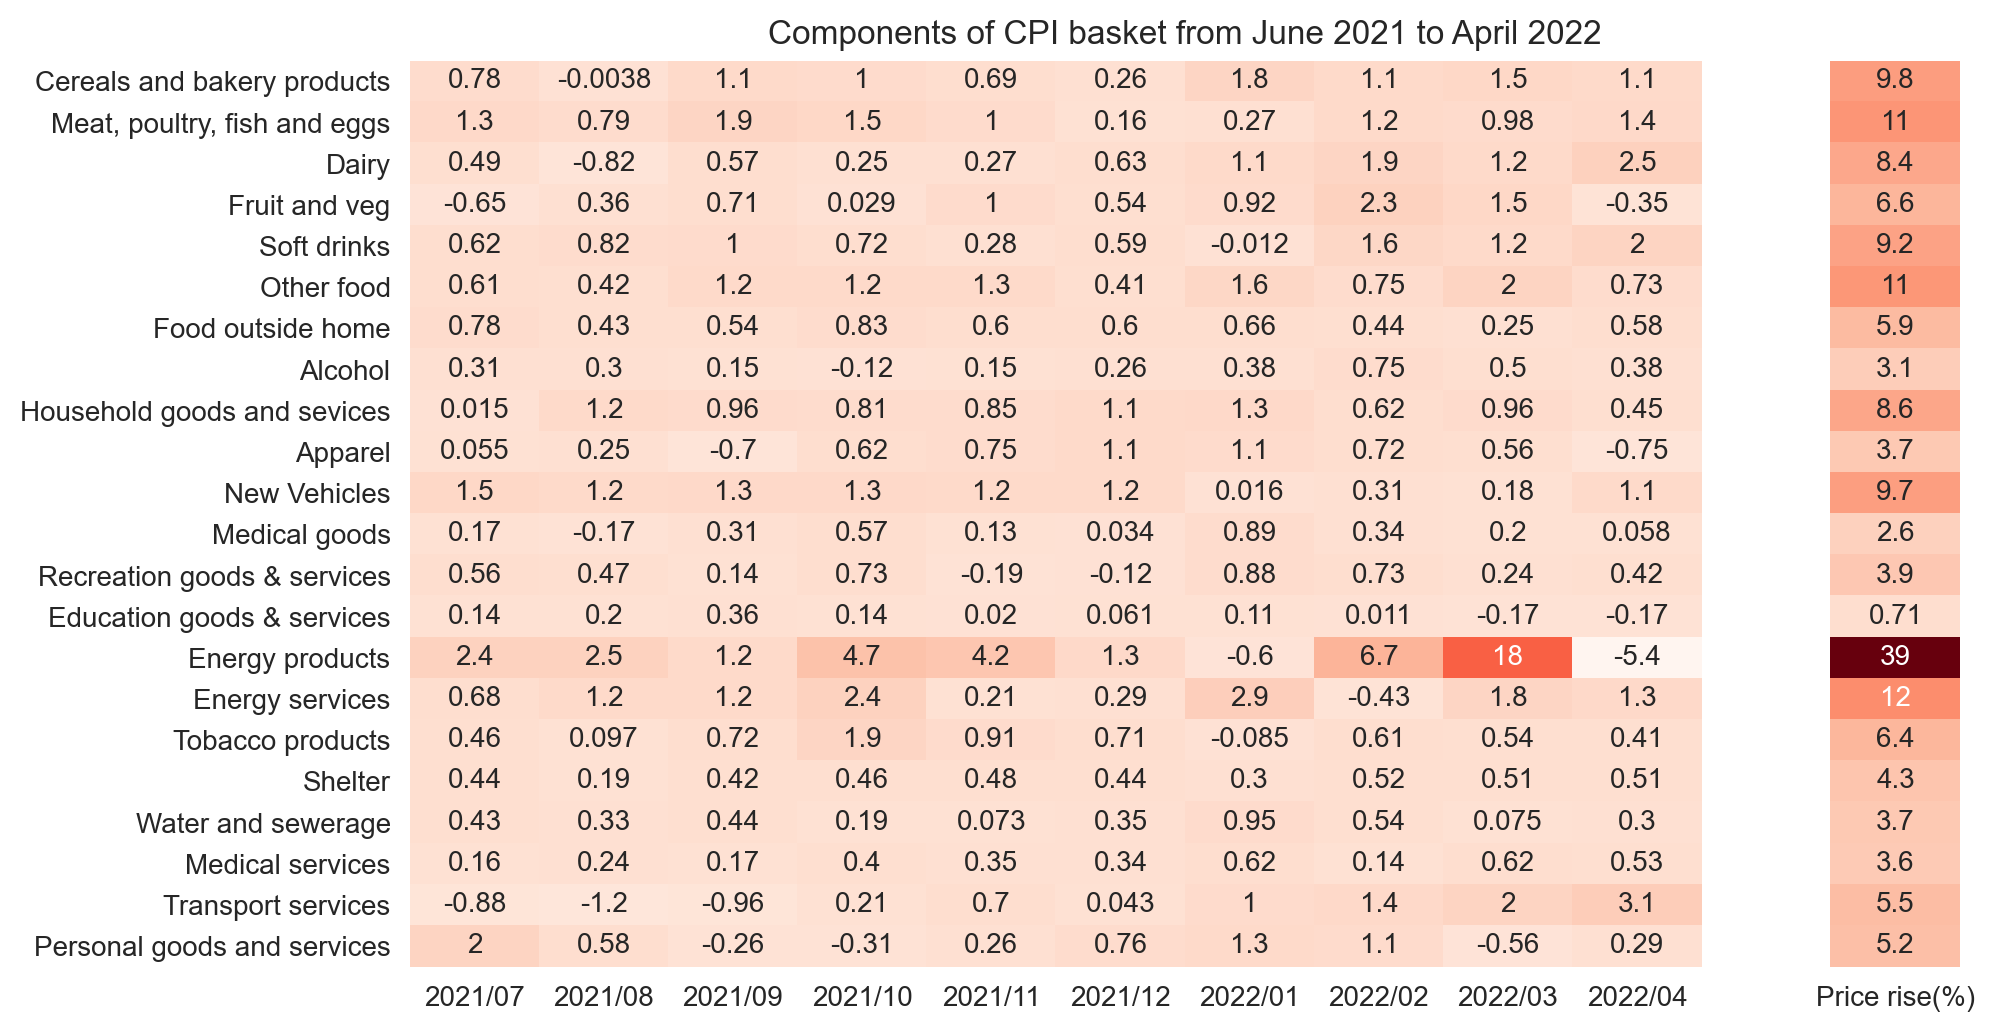

In [7]:
plt.figure(dpi=200, figsize=(10,6))
sns.heatmap(cpi_merge, annot=True, cmap=plt.get_cmap('Reds'), cbar=False).set(title='Components of CPI basket from June 2021 to April 2022')
plt.xticks(rotation=0)
plt.show()

# US equity sectors

In [8]:
db = get_available_datasets()
df_12 = [dataset for dataset in db if '12' in dataset and 'Industry' in dataset]
ds_industry = web.DataReader(df_12[0], 'famafrench', start='2021-06-01')

us_sectors = ds_industry[0] #choose value-weighted portfolios
us_sectors.rename(columns={"Shops": "Retail", "Money": "Financials"}, inplace=True)
pct_us_sectors = us_sectors/100
pct_us_sectors

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Retail,Hlth,Financials,Other
Date,,,,,,,,,,,,
2021-06,-0.0074,0.0566,-0.0007,0.0550,-0.0237,0.0697,-0.0012,-0.0142,0.0284,0.0428,-0.0217,-0.0274
2021-07,0.0020,-0.0069,0.0088,-0.0852,0.0240,0.0345,0.0031,0.0298,0.0026,0.0315,0.0028,-0.0127
2021-08,-0.0029,0.0173,0.0068,-0.0135,0.0020,0.0468,0.0140,0.0323,0.0239,0.0285,0.0266,0.0230
2021-09,-0.0457,0.0284,-0.0624,0.1063,-0.0469,-0.0627,-0.0565,-0.0484,-0.0420,-0.0594,-0.0159,-0.0350
2021-10,0.0375,0.3063,0.0451,0.1025,0.0594,0.0769,-0.0430,0.0511,0.0496,0.0232,0.0687,0.0732
2021-11,-0.0377,0.0170,-0.0109,-0.0546,0.0043,0.0099,-0.0724,-0.0196,0.0150,-0.0418,-0.0567,-0.0397
2021-12,0.0805,-0.0444,0.0415,0.0309,0.0960,0.0178,0.0386,0.0857,0.0134,0.0674,0.0485,0.0530
2022-01,-0.0067,-0.1015,-0.0557,0.1735,-0.0625,-0.0827,-0.0199,-0.0210,-0.0895,-0.0860,-0.0062,-0.0621
2022-02,-0.0053,-0.0721,-0.0016,0.0808,-0.0347,-0.0514,0.0026,-0.0111,-0.0155,-0.0105,-0.0166,0.0022


In [9]:
standard = [100]*12
c_us_sectors = pct_us_sectors
c_us_sectors.iloc[0,:] = standard

for i in range(1,len(c_us_sectors)):
    c_us_sectors.iloc[i,:]= c_us_sectors.iloc[i-1,:] * (1 + c_us_sectors.iloc[i,:])

c_us_sectors

,NoDur,Durbl,Manuf,Enrgy,Chems,BusEq,Telcm,Utils,Retail,Hlth,Financials,Other
Date,,,,,,,,,,,,
2021-06,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2021-07,100.200000,99.310000,100.880000,91.480000,102.400000,103.450000,100.310000,102.980000,100.260000,103.150000,100.280000,98.730000
2021-08,99.909420,101.028063,101.565984,90.245020,102.604800,108.291460,101.714340,106.306254,102.656214,106.089775,102.947448,101.000790
2021-09,95.343560,103.897260,95.228267,99.838066,97.792635,101.501585,95.967480,101.161031,98.344653,99.788042,101.310584,97.465762
2021-10,98.918943,135.720991,99.523061,110.071467,103.601517,109.307057,91.840878,106.330360,103.222548,102.103125,108.270621,104.600256
2021-11,95.189699,138.028248,98.438260,104.061565,104.047004,110.389197,85.191599,104.246285,104.770886,97.835214,102.131676,100.447626
2021-12,102.852470,131.899793,102.523448,107.277068,114.035516,112.354125,88.479994,113.180192,106.174816,104.429308,107.085063,105.771350
2022-01,102.163358,118.511964,96.812892,125.889639,106.908297,103.062439,86.719242,110.803408,96.672170,95.448387,106.421135,99.202949
2022-02,101.621892,109.967252,96.657991,136.061522,103.198579,97.765029,86.944712,109.573490,95.173751,94.446179,104.654545,99.421196


Highest return: Enrgy
Lowest return: Telcm


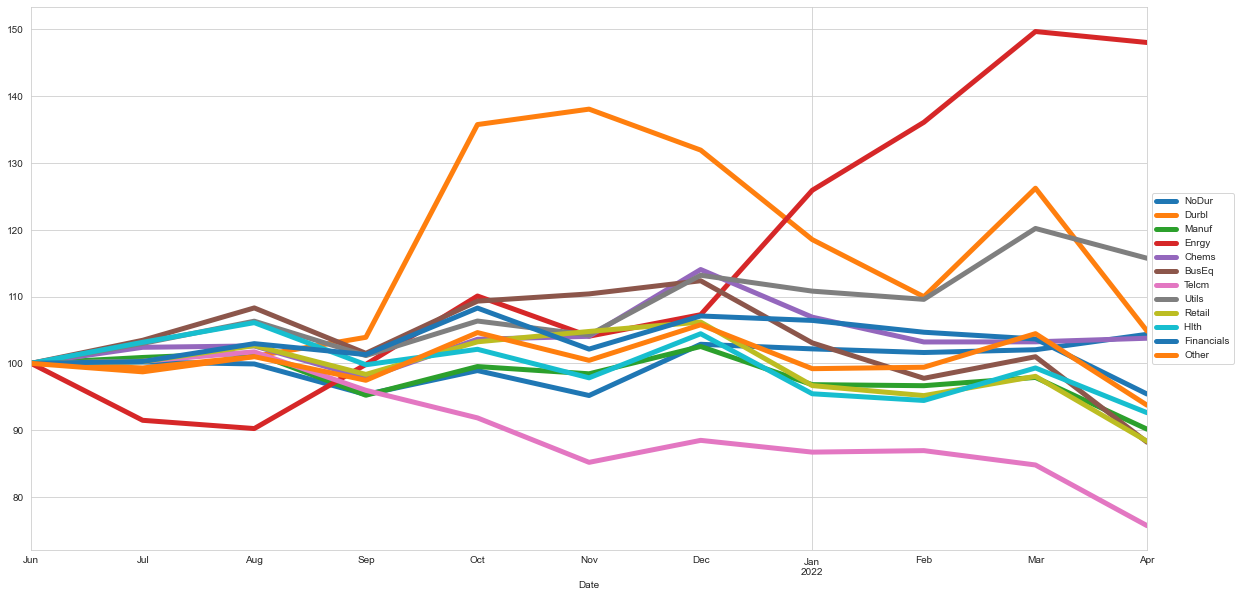

In [10]:
print('Highest return:', c_us_sectors.iloc[-1].idxmax())
print('Lowest return:', c_us_sectors.iloc[-1].idxmin())

c_us_sectors.plot(figsize=(20,10), linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [11]:
t_us_sectors = c_us_sectors.pct_change(len(c_us_sectors)-1)
t_us_sectors.dropna(how='any', inplace=True)
t_us_sectors.index = ['Total Return']
t_us_sectors = t_us_sectors.transpose() * 100
t_us_sectors

,Total Return
NoDur,4.344613
Durbl,4.833026
Manuf,-9.848298
Enrgy,47.994416
Chems,3.755958
BusEq,-11.794220
Telcm,-24.284600
Utils,15.721518
Retail,-11.650178
Hlth,-7.383347


In [12]:
ts_us = us_sectors.transpose()
ts_us

Date,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04
NoDur,-0.74,0.20,-0.29,-4.57,3.75,-3.77,8.05,-0.67,-0.53,0.41,2.26
Durbl,5.66,-0.69,1.73,2.84,30.63,1.70,-4.44,-10.15,-7.21,14.76,-16.93
Manuf,-0.07,0.88,0.68,-6.24,4.51,-1.09,4.15,-5.57,-0.16,1.28,-7.91
Enrgy,5.50,-8.52,-1.35,10.63,10.25,-5.46,3.09,17.35,8.08,9.98,-1.10
Chems,-2.37,2.40,0.20,-4.69,5.94,0.43,9.60,-6.25,-3.47,0.02,0.52
BusEq,6.97,3.45,4.68,-6.27,7.69,0.99,1.78,-8.27,-5.14,3.30,-12.66
Telcm,-0.12,0.31,1.40,-5.65,-4.30,-7.24,3.86,-1.99,0.26,-2.47,-10.71
Utils,-1.42,2.98,3.23,-4.84,5.11,-1.96,8.57,-2.10,-1.11,9.68,-3.71
Retail,2.84,0.26,2.39,-4.20,4.96,1.50,1.34,-8.95,-1.55,3.03,-9.90
Hlth,4.28,3.15,2.85,-5.94,2.32,-4.18,6.74,-8.60,-1.05,5.15,-6.74


In [13]:
ts_us[' '] = np.full([1,len(ts_us)], np.nan)[0].tolist()
# ts_us
all_us_sectors = ts_us.merge(t_us_sectors, left_index=True, right_index=True)
all_us_sectors

,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,,Total Return
NoDur,-0.74,0.20,-0.29,-4.57,3.75,-3.77,8.05,-0.67,-0.53,0.41,2.26,NaN,4.344613
Durbl,5.66,-0.69,1.73,2.84,30.63,1.70,-4.44,-10.15,-7.21,14.76,-16.93,NaN,4.833026
Manuf,-0.07,0.88,0.68,-6.24,4.51,-1.09,4.15,-5.57,-0.16,1.28,-7.91,NaN,-9.848298
Enrgy,5.50,-8.52,-1.35,10.63,10.25,-5.46,3.09,17.35,8.08,9.98,-1.10,NaN,47.994416
Chems,-2.37,2.40,0.20,-4.69,5.94,0.43,9.60,-6.25,-3.47,0.02,0.52,NaN,3.755958
BusEq,6.97,3.45,4.68,-6.27,7.69,0.99,1.78,-8.27,-5.14,3.30,-12.66,NaN,-11.794220
Telcm,-0.12,0.31,1.40,-5.65,-4.30,-7.24,3.86,-1.99,0.26,-2.47,-10.71,NaN,-24.284600
Utils,-1.42,2.98,3.23,-4.84,5.11,-1.96,8.57,-2.10,-1.11,9.68,-3.71,NaN,15.721518
Retail,2.84,0.26,2.39,-4.20,4.96,1.50,1.34,-8.95,-1.55,3.03,-9.90,NaN,-11.650178
Hlth,4.28,3.15,2.85,-5.94,2.32,-4.18,6.74,-8.60,-1.05,5.15,-6.74,NaN,-7.383347


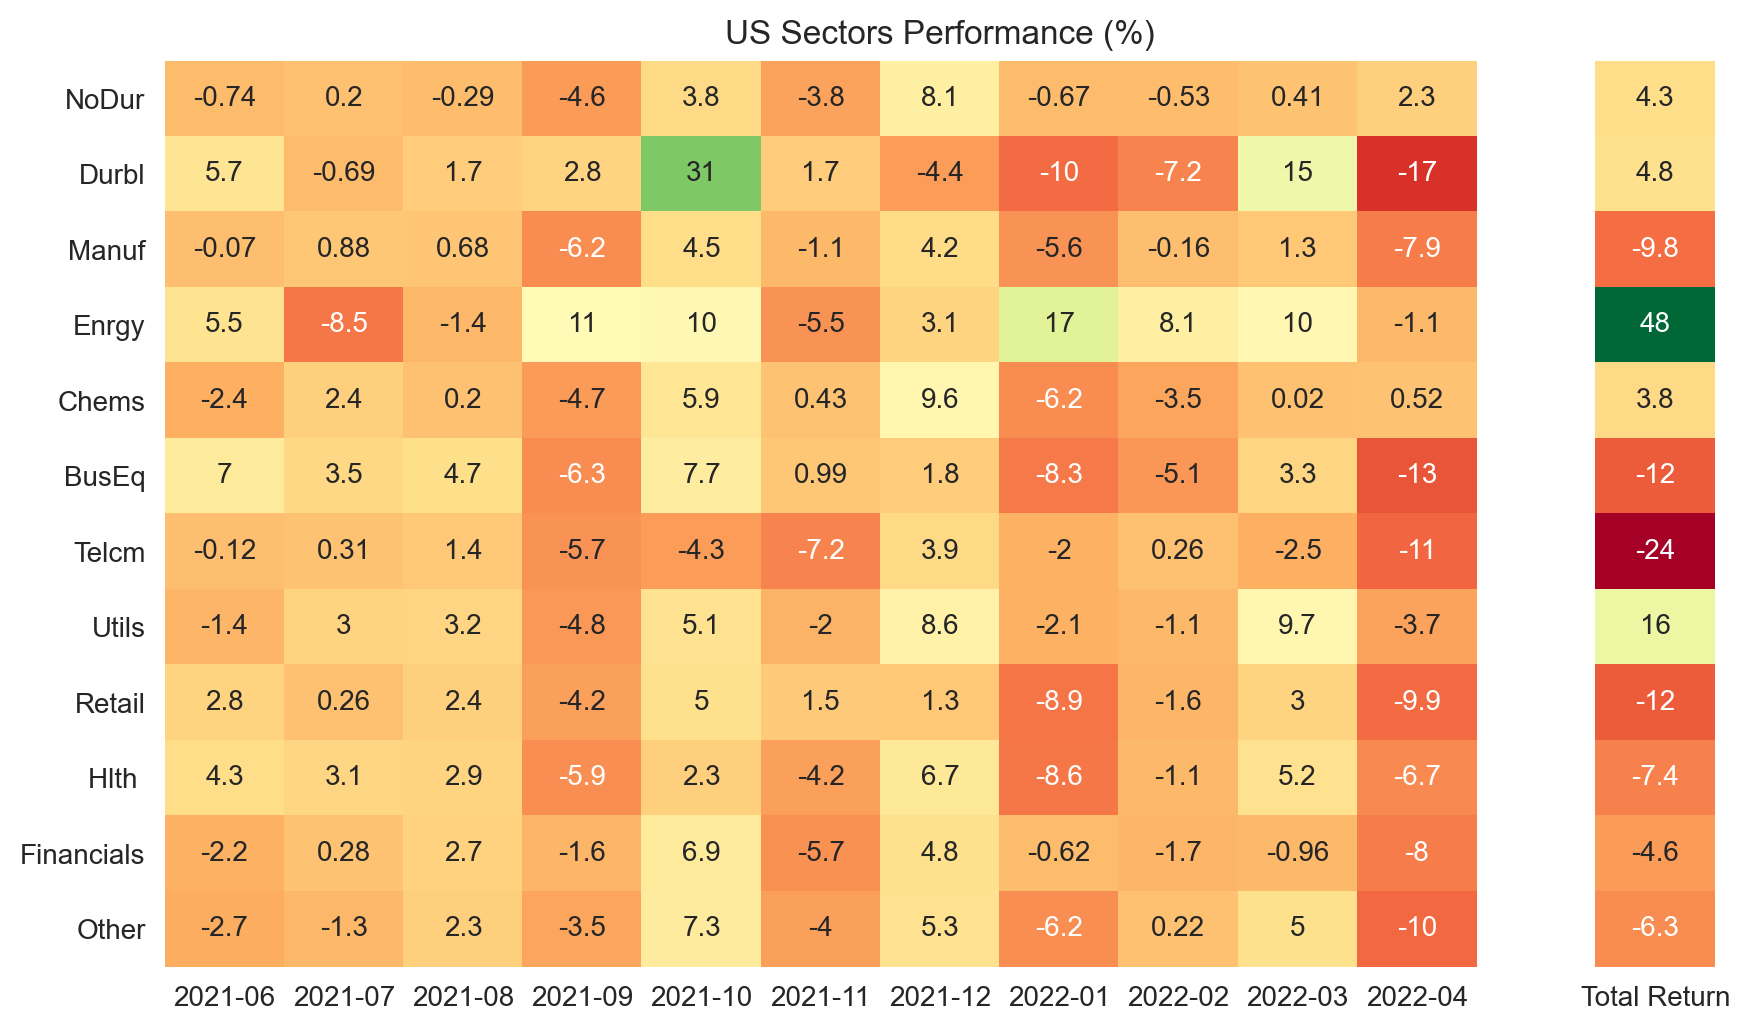

In [14]:
plt.figure(dpi=200, figsize=(10,6))
sns.heatmap(all_us_sectors, annot=True, cmap=plt.get_cmap('RdYlGn'), cbar=False).set(title='US Sectors Performance (%)')
plt.xticks(rotation=0)
plt.show()
#colormap:https://matplotlib.org/stable/tutorials/colors/colormaps.html

# Fixed income

In [15]:
file = ['S&P U.S. Treasury Bond Current 30-Year Index.xls', 'S&P U.S. Treasury Bond Current 10-Year Index.xls', 'S&P U.S. Treasury Bond Current 2-Year Index.xls', 'S&P 500 Investment Grade Corporate Bond Index.xls', 'S&P U.S. High Yield Corporate Bond Index.xls', 'S&P U.S. TIPS 10 Year Index.xls']

df = pd.DataFrame()

for i in range(len(file)):
    df_temp = pd.read_excel(file[i])
    df_temp = df_temp.loc[6:257]
    df_temp.columns = ['Date', file[i]]
    df_temp.set_index('Date', inplace = True)
    # print(df_temp)
    df = pd.concat([df,df_temp], axis = 1)

name = ['US Treasury 30 yr', 'US Treasury 10 yr', 'US Treasury 2 yr', 'S&P 500 IG Index', 'S&P US HY Index', 'US TIPS 10 yr']
df.columns = name
df

,US Treasury 30 yr,US Treasury 10 yr,US Treasury 2 yr,S&P 500 IG Index,S&P US HY Index,US TIPS 10 yr
Date,,,,,,
2021-05-20,838.82,571.15,332.61,484.63,742.69,285.5
2021-05-21,841.77,571.44,332.56,485.24,743.35,285.81
2021-05-24,845.11,572.34,332.62,486.14,744.08,286.58
2021-05-25,855.02,574.96,332.67,488.13,744.8,287.7
2021-05-26,853.62,573.96,332.67,488,745.2,286.67
...,...,...,...,...,...,...
2022-05-16,722.05,519.78,321.88,433.36,688.86,279.82
2022-05-17,711.05,515.74,321.15,430.72,688.49,278.18
2022-05-18,726.88,519.83,321.32,432.63,684.75,281.12


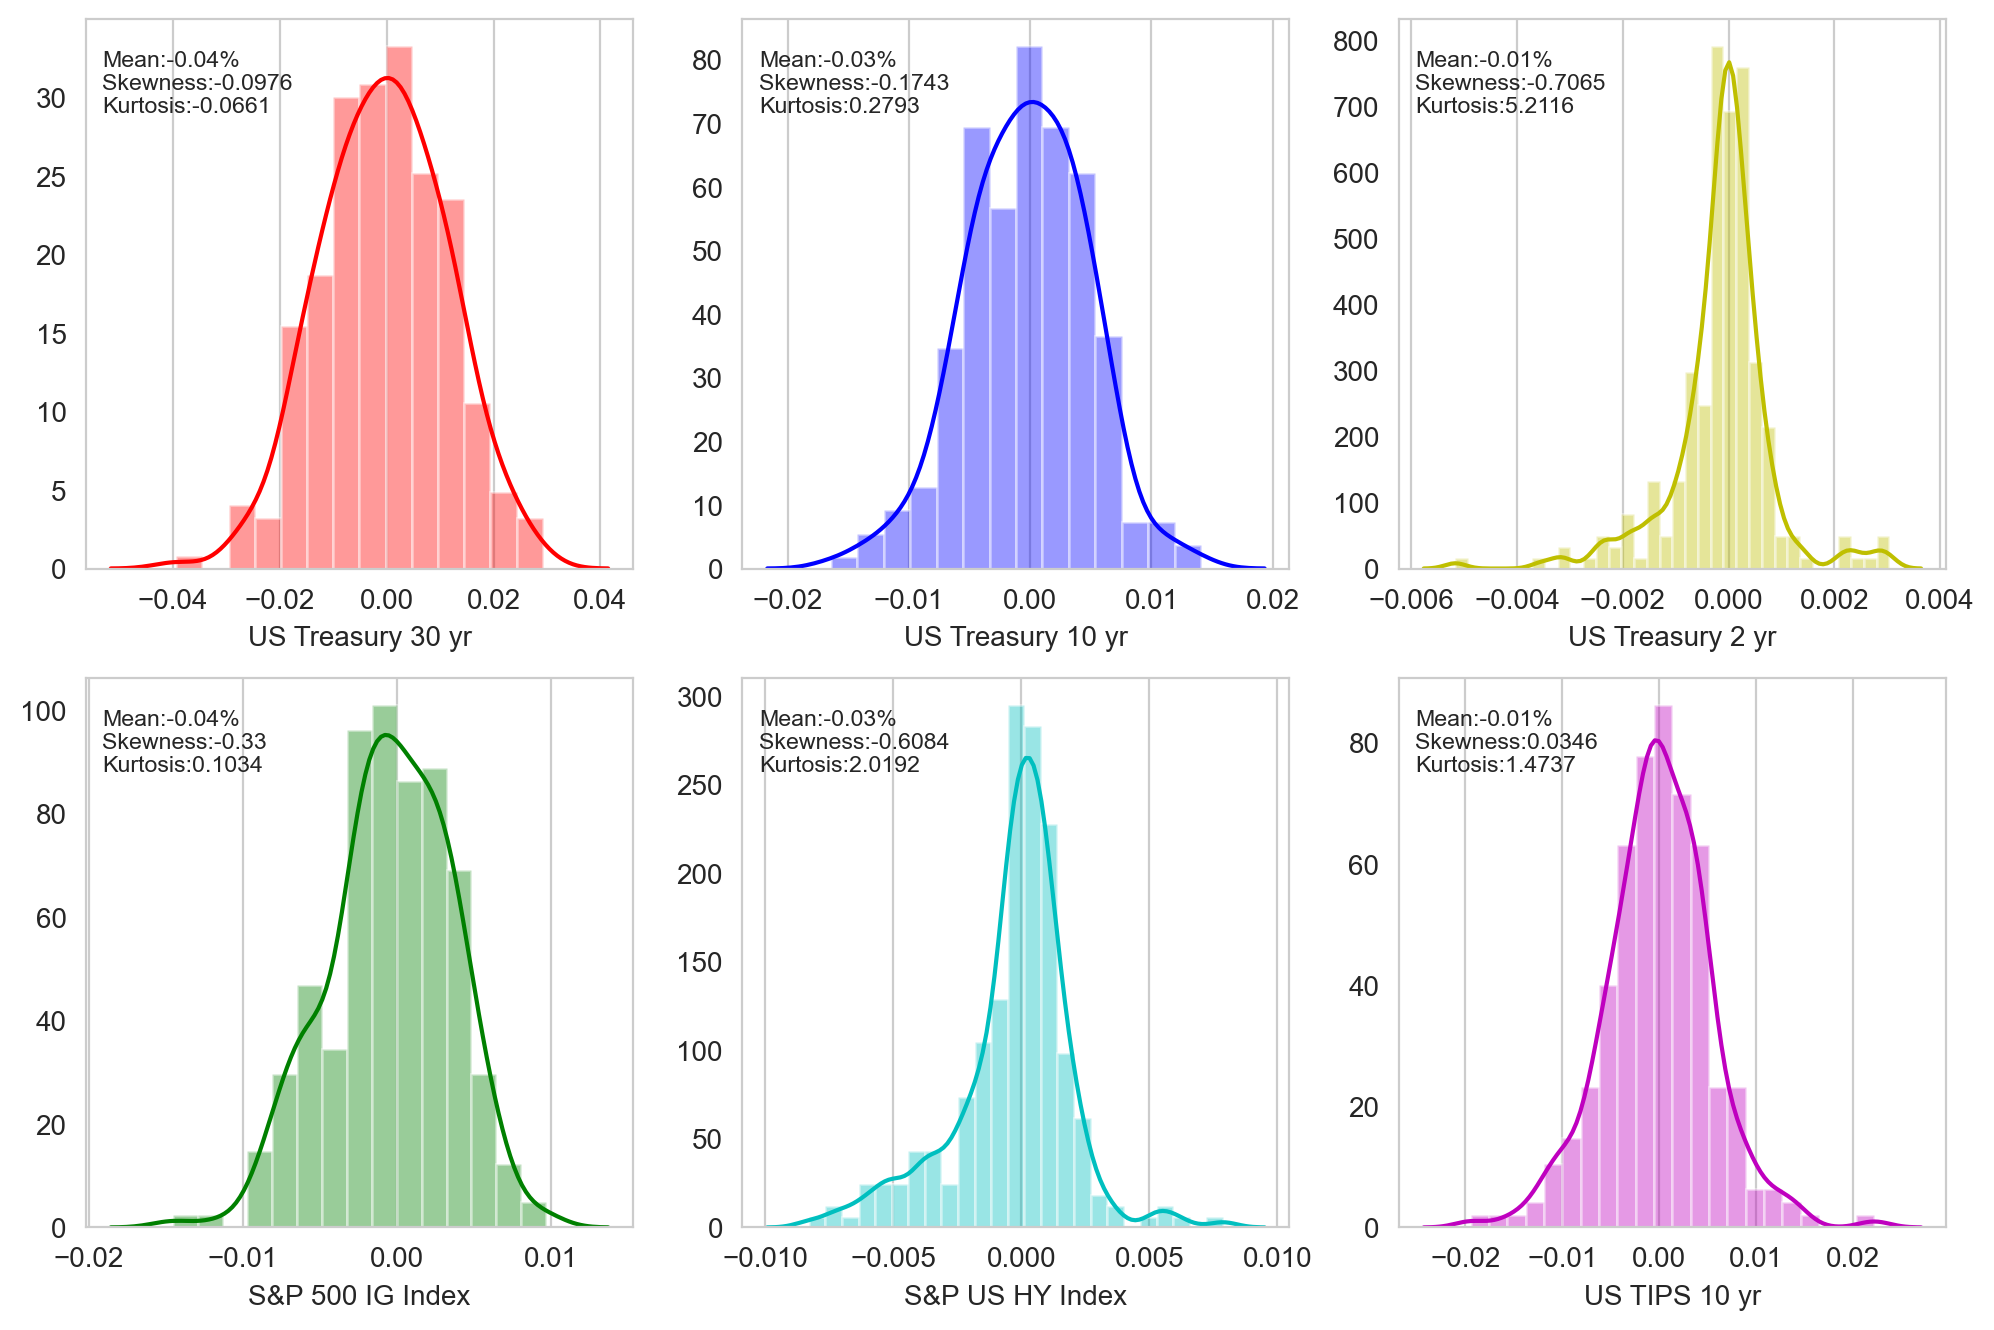

In [16]:
locate = [231,232,233,234,235,236]
color = ['r','b','y','g','c','m']

plt.figure(dpi=200, figsize=(12,8))
for i in range(len(name)):
    skew = round(df[name[i]].pct_change().dropna().skew(),4)
    mean = round(df[name[i]].pct_change().dropna().mean(),4)*100
    kurt = round(df[name[i]].pct_change().dropna().kurt(),4)
    plt.subplot(locate[i])
    D_dist = sns.distplot(df[name[i]].pct_change().dropna(), color=color[i])
    D_dist.set_title(f'Mean:{mean}%\nSkewness:{skew}\nKurtosis:{kurt}', loc='left', x=0.03, y=0.8, fontsize='small')
    D_dist.grid(axis='y')
plt.show()


In [17]:
df = df.asfreq('M', method='ffill')
df

,US Treasury 30 yr,US Treasury 10 yr,US Treasury 2 yr,S&P 500 IG Index,S&P US HY Index,US TIPS 10 yr
Date,,,,,,
2021-05-31,850.23,572.84,332.73,487.26,746.04,286.56
2021-06-30,890.98,581.27,332.24,495.9,756.48,289.99
2021-07-31,927.5,594.19,332.85,502.69,760.06,300.86
2021-08-31,925,591.67,332.94,501.19,763.49,299.08
2021-09-30,894.7,581.04,332.61,496.09,763.41,295.23
2021-10-31,924.61,579.07,331.58,496.97,762.41,299.21
2021-11-30,956.16,587.2,331.53,497.45,755.38,302.35
2021-12-31,931.75,583.65,330.74,496.03,767.97,304.63
2022-01-31,892.26,570.51,328.32,480.73,747.17,297.45


In [18]:
fixed_pct_df = df.pct_change().dropna()
fixed_pct_df.index = fixed_pct_df.index.strftime('%Y-%m')
fixed_pct_df = fixed_pct_df.transpose()
fixed_pct_df[' '] = np.full([1,len(fixed_pct_df)], np.nan)[0].tolist()

fixed_total_return_df = df.pct_change(len(df)-1).dropna().transpose()
fixed_total_return_df.columns = ['Total Return']
# display(fixed_pct_df)
# display(fixed_total_return_df)

all_fixed_df = fixed_pct_df.merge(fixed_total_return_df, left_index=True, right_index=True)*100
all_fixed_df

,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,,Total Return
US Treasury 30 yr,4.792821,4.098857,-0.269542,-3.275676,3.343020,3.412249,-2.552920,-4.238261,-1.422231,-5.789192,-10.104387,NaN,-12.386060
US Treasury 10 yr,1.471615,2.222719,-0.424107,-1.796610,-0.339047,1.403975,-0.604564,-2.251349,-0.310249,-4.195239,-4.725811,NaN,-9.376091
US Treasury 2 yr,-0.147267,0.183602,0.027039,-0.099117,-0.309672,-0.015079,-0.238289,-0.731693,-0.389864,-1.418787,-0.533499,NaN,-3.621555
S&P 500 IG Index,1.773181,1.369228,-0.298395,-1.017578,0.177387,0.096585,-0.285456,-3.084491,-1.915836,-2.362572,-5.241322,NaN,-10.468744
S&P US HY Index,1.399389,0.473245,0.451280,-0.010478,-0.130991,-0.922076,1.666711,-2.708439,-1.101490,-1.088045,-3.569572,NaN,-5.526513
US TIPS 10 yr,1.196957,3.748405,-0.591637,-1.287281,1.348101,1.049430,0.754093,-2.356958,1.317869,-2.226499,-3.661848,NaN,-0.938721


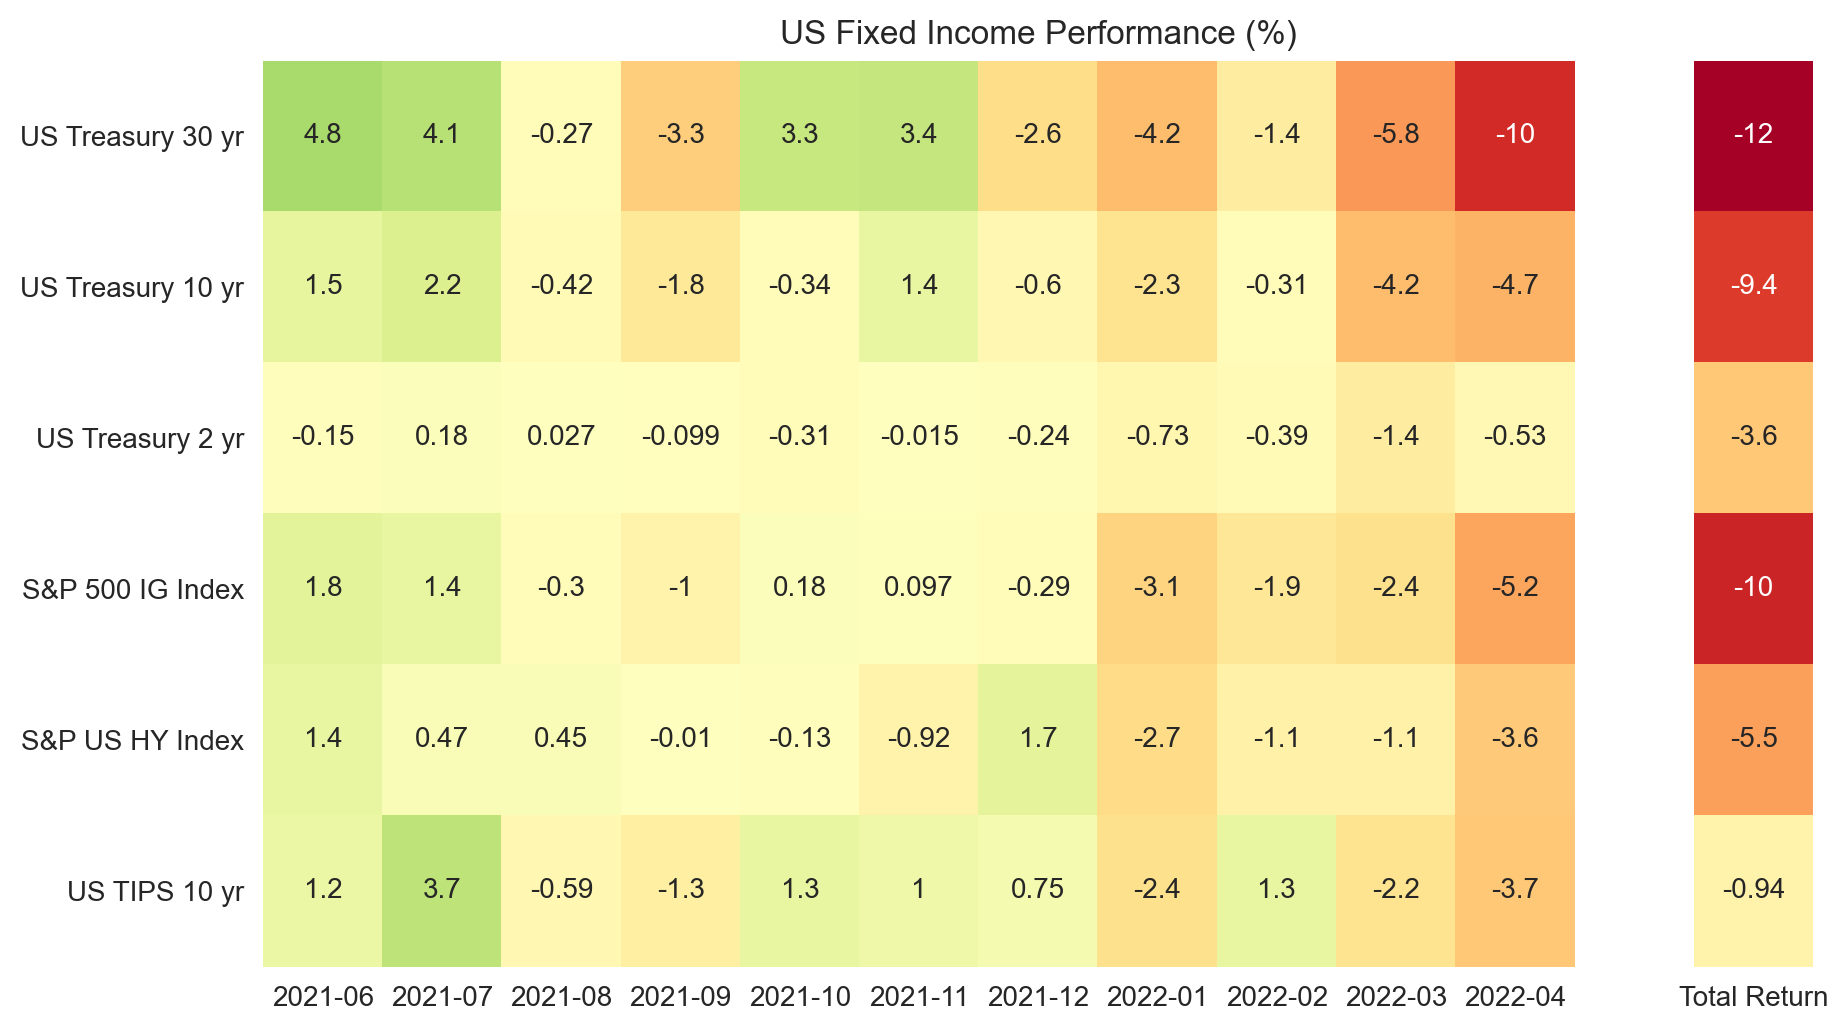

In [19]:
plt.figure(dpi=200, figsize=(10,6))
sns.heatmap(all_fixed_df, annot=True, cmap=plt.get_cmap('RdYlGn'), center=0, cbar=False).set(title='US Fixed Income Performance (%)')
plt.xticks(rotation=0)
plt.show()

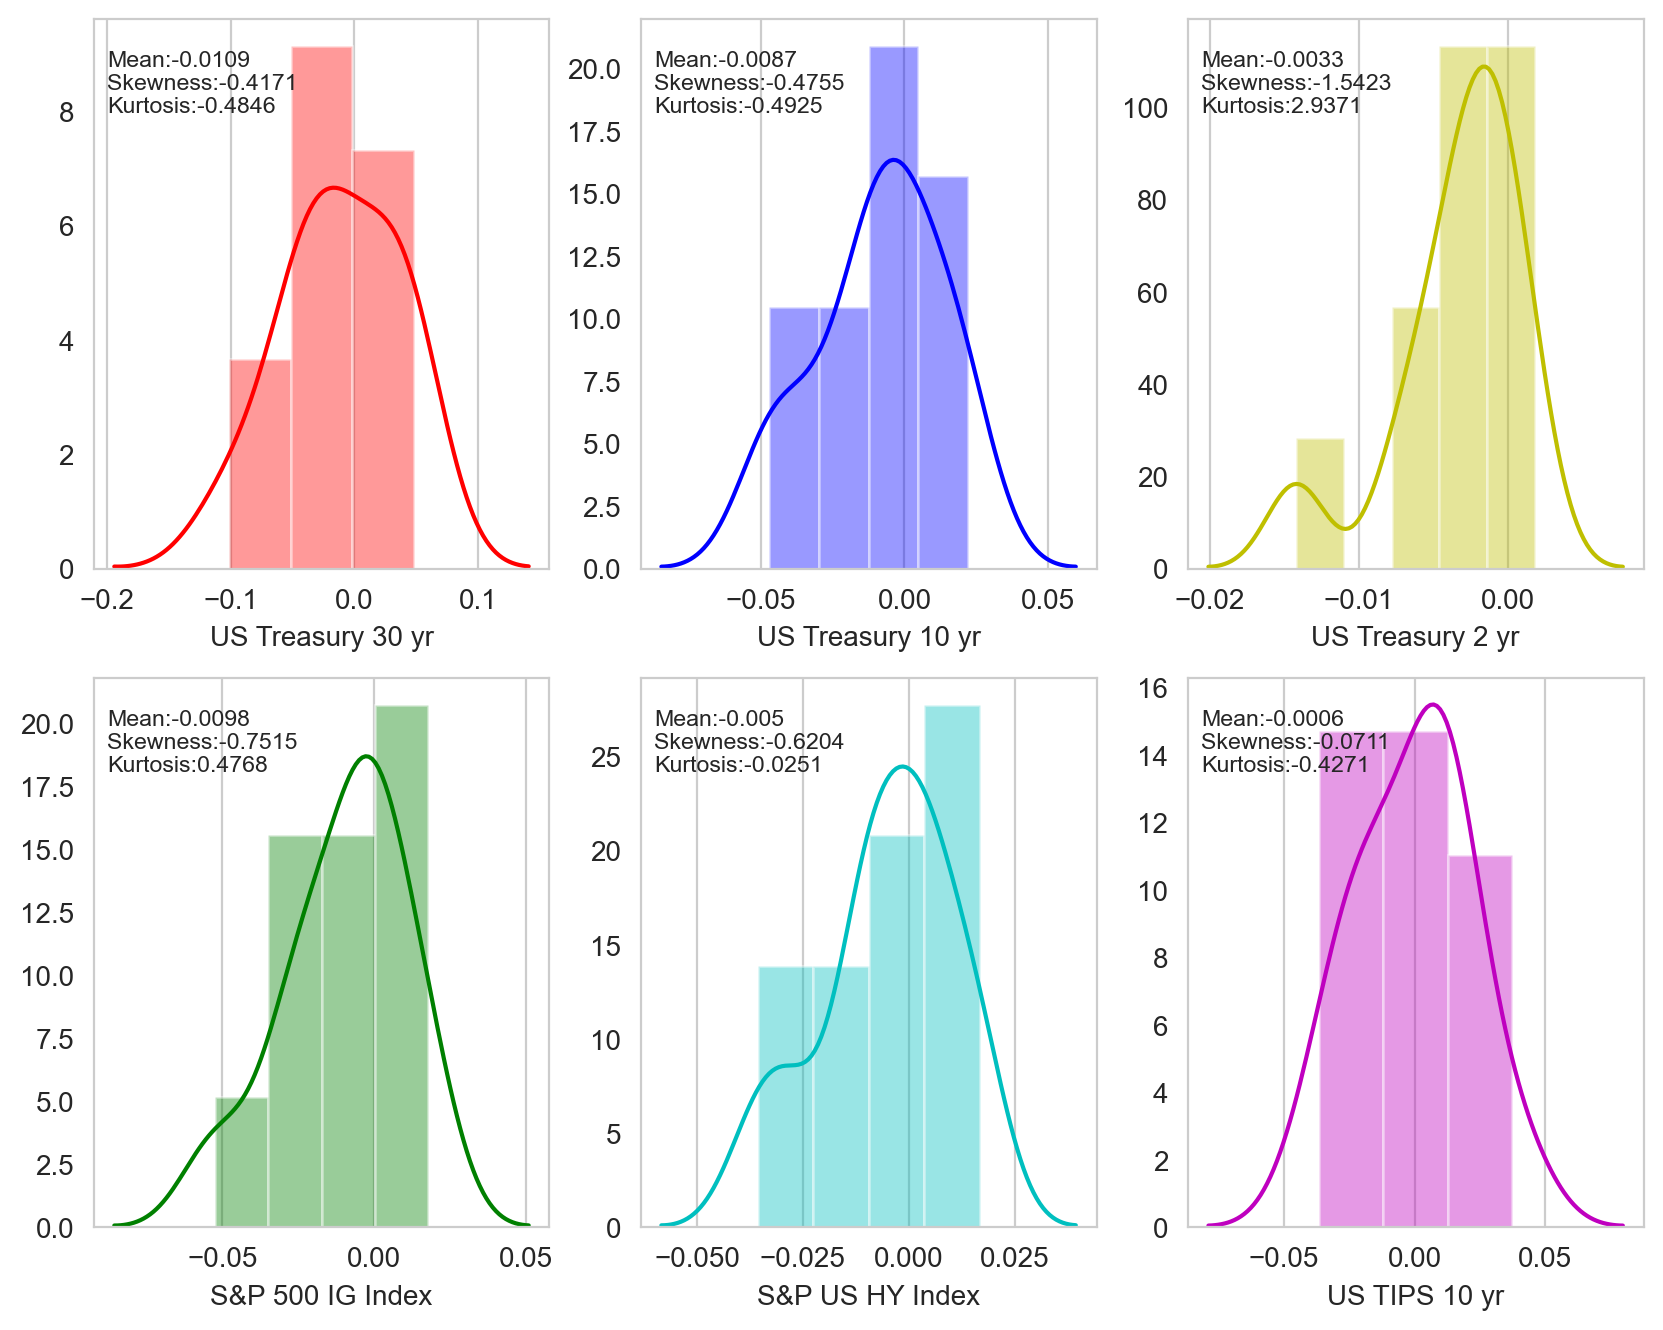

In [20]:
dis_fixed = fixed_pct_df.transpose().dropna()
# display(dis_fixed)

locate = [231,232,233,234,235,236]
color = ['r','b','y','g','c','m']

plt.figure(dpi=200, figsize=(10,8))
for i in range(len(name)):
    skew = round(dis_fixed[name[i]].skew(),4)
    mean = round(dis_fixed[name[i]].mean(),4)
    kurt = round(dis_fixed[name[i]].kurt(),4)
    plt.subplot(locate[i])
    M_dist = sns.distplot(dis_fixed[name[i]], color=color[i])
    M_dist.set_title(f'Mean:{mean}\nSkewness:{skew}\nKurtosis:{kurt}', loc='left', x=0.03, y=0.8, fontsize='small')
    M_dist.grid(axis='y')
    
plt.show()

# Commodities

In [21]:
com_list = ['HG=F','GC=F','SI=F','PL=F','ZW=F','ZC=F','ZS=F','CC=F','CT=F','KC=F','SB=F','LE=F','HE=F','BZ=F','CL=F','HO=F']
name_list = ['Copper','Gold','Silver','Platinum','Wheat','Corn','Soybean','Cocoa','Cotton','Coffee','Sugar','Cattle','Hogs','Brent','WTI','Heating oil']
#COMEX: copper, gold, silver, platinum
#CBOT: wheat, corn, soybean
#ICE: cocoa, cotton, coffee, sugar
#CME: cattle, hogs
#NYMEX: Brent, WTI, heating oil

df_com = web.DataReader(com_list, 'yahoo', '2021-05-01', '2022-05-23')['Adj Close']
df_com.columns = name_list
df_com = df_com.dropna()
df_com

,Copper,Gold,Silver,Platinum,Wheat,Corn,Soybean,Cocoa,Cotton,Coffee,Sugar,Cattle,Hogs,Brent,WTI,Heating oil
Date,,,,,,,,,,,,,,,,
2021-05-03,4.5430,1791.400024,26.943001,1227.900024,725.50,732.25,1560.25,2328.0,87.209999,138.750000,16.730000,115.300003,110.699997,67.290001,64.489998,1.9519
2021-05-05,4.5390,1784.099976,26.502001,1226.599976,755.75,753.25,1582.00,2354.0,86.230003,148.500000,17.530001,114.425003,111.375000,68.959999,65.629997,2.0025
2021-05-06,4.6190,1815.500000,27.462000,1255.500000,764.25,759.50,1605.50,2372.0,89.480003,153.500000,17.549999,115.474998,111.400002,68.089996,64.709999,1.9895
2021-05-07,4.7660,1831.099976,27.462000,1252.300049,773.50,772.75,1621.00,2422.0,89.660004,152.300003,17.490000,116.025002,111.974998,68.279999,64.900002,2.0106
2021-05-10,4.7335,1837.500000,27.479000,1263.000000,742.50,748.00,1620.00,2473.0,88.470001,147.600006,17.490000,118.224998,111.900002,68.320000,64.919998,2.0166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-18,4.1820,1815.900024,21.533001,927.900024,1230.75,781.50,1662.75,2470.0,144.470001,218.600006,19.830000,131.500000,106.099998,109.110001,109.589996,3.6681
2022-05-19,4.2850,1841.199951,21.898001,957.500000,1200.50,783.25,1690.50,2457.0,147.699997,218.699997,19.770000,131.500000,105.300003,112.040001,112.209999,3.7920
2022-05-20,4.2810,1841.800049,21.669001,946.200012,1168.75,778.75,1705.25,2429.0,142.270004,215.850006,19.950001,131.574997,108.875000,112.550003,113.230003,3.7391


In [22]:
df_M_com = df_com.asfreq('M', method='ffill')
# display(df_M_com)

df_com_M_pct = df_M_com.pct_change()

basket_M_com = pd.DataFrame()
basket_M_com['Industrials'] = df_com_M_pct['Copper']
basket_M_com['Precious'] = (df_com_M_pct['Gold'] + df_com_M_pct['Silver'] + df_com_M_pct['Platinum']) / 3
basket_M_com['Agris'] = (df_com_M_pct['Wheat'] + df_com_M_pct['Corn'] + df_com_M_pct['Soybean']) / 3
basket_M_com['Softs'] = (df_com_M_pct['Cocoa'] + df_com_M_pct['Cotton'] + df_com_M_pct['Coffee'] + df_com_M_pct['Sugar']) / 4
basket_M_com['Livestock'] = (df_com_M_pct['Cattle'] + df_com_M_pct['Hogs']) / 2
basket_M_com['Energies'] = (df_com_M_pct['Brent'] + df_com_M_pct['WTI'] + df_com_M_pct['Heating oil']) / 3
basket_M_com = basket_M_com.dropna()
basket_M_com.index = basket_M_com.index.strftime('%Y-%m')
basket_M_com = basket_M_com.transpose()
basket_M_com[' '] = np.full([1,len(basket_M_com)], np.nan)[0].tolist()
# display(basket_M_com)

basket_total = df_M_com.pct_change(len(df_M_com)-1).dropna()
basket_total['Industrials'] = basket_total['Copper']
basket_total['Precious'] = (basket_total['Gold'] + basket_total['Silver'] + basket_total['Platinum']) / 3
basket_total['Agris'] = (basket_total['Wheat'] + basket_total['Corn'] + basket_total['Soybean']) / 3
basket_total['Softs'] = (basket_total['Cocoa'] + basket_total['Cotton'] + basket_total['Coffee'] + basket_total['Sugar']) / 4
basket_total['Livestock'] = (basket_total['Cattle'] + basket_total['Hogs']) / 2
basket_total['Energies'] = (basket_total['Brent'] + basket_total['WTI'] + basket_total['Heating oil']) / 3
# display(basket_total)
total_basket_com = basket_total.iloc[:,-6:].transpose()
total_basket_com.columns = ['Total Return']

all_basket = basket_M_com.merge(total_basket_com, right_index=True, left_index=True)
all_basket = all_basket*100
all_basket

,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,,Total Return
Industrials,-5.217291,4.282556,-2.689434,-6.192660,6.980441,-2.228324,4.137449,-3.075198,2.929600,6.716167,-7.337129,NaN,-3.044342
Precious,-7.865559,-0.759539,-3.054011,-5.536415,5.474680,-4.858796,3.197182,-0.031859,5.473288,0.458870,-5.287460,NaN,-12.873864
Agris,5.093505,-7.218711,-3.383213,-0.041219,3.589714,-0.529211,4.467300,5.486989,14.547273,4.723858,6.198728,NaN,35.197129
Softs,1.694651,5.355310,7.814771,4.654604,1.193087,-0.234440,2.048299,3.524272,-1.738009,5.503430,1.961102,NaN,37.563306
Livestock,-0.785533,-0.766633,-9.472039,2.259634,-5.654523,1.562042,6.632743,4.538778,8.822464,-1.245766,0.488138,NaN,4.692346
Energies,8.045807,1.857277,-4.951839,8.998867,8.483832,-18.168097,12.925657,16.928276,9.507652,11.369641,11.755368,NaN,83.560693


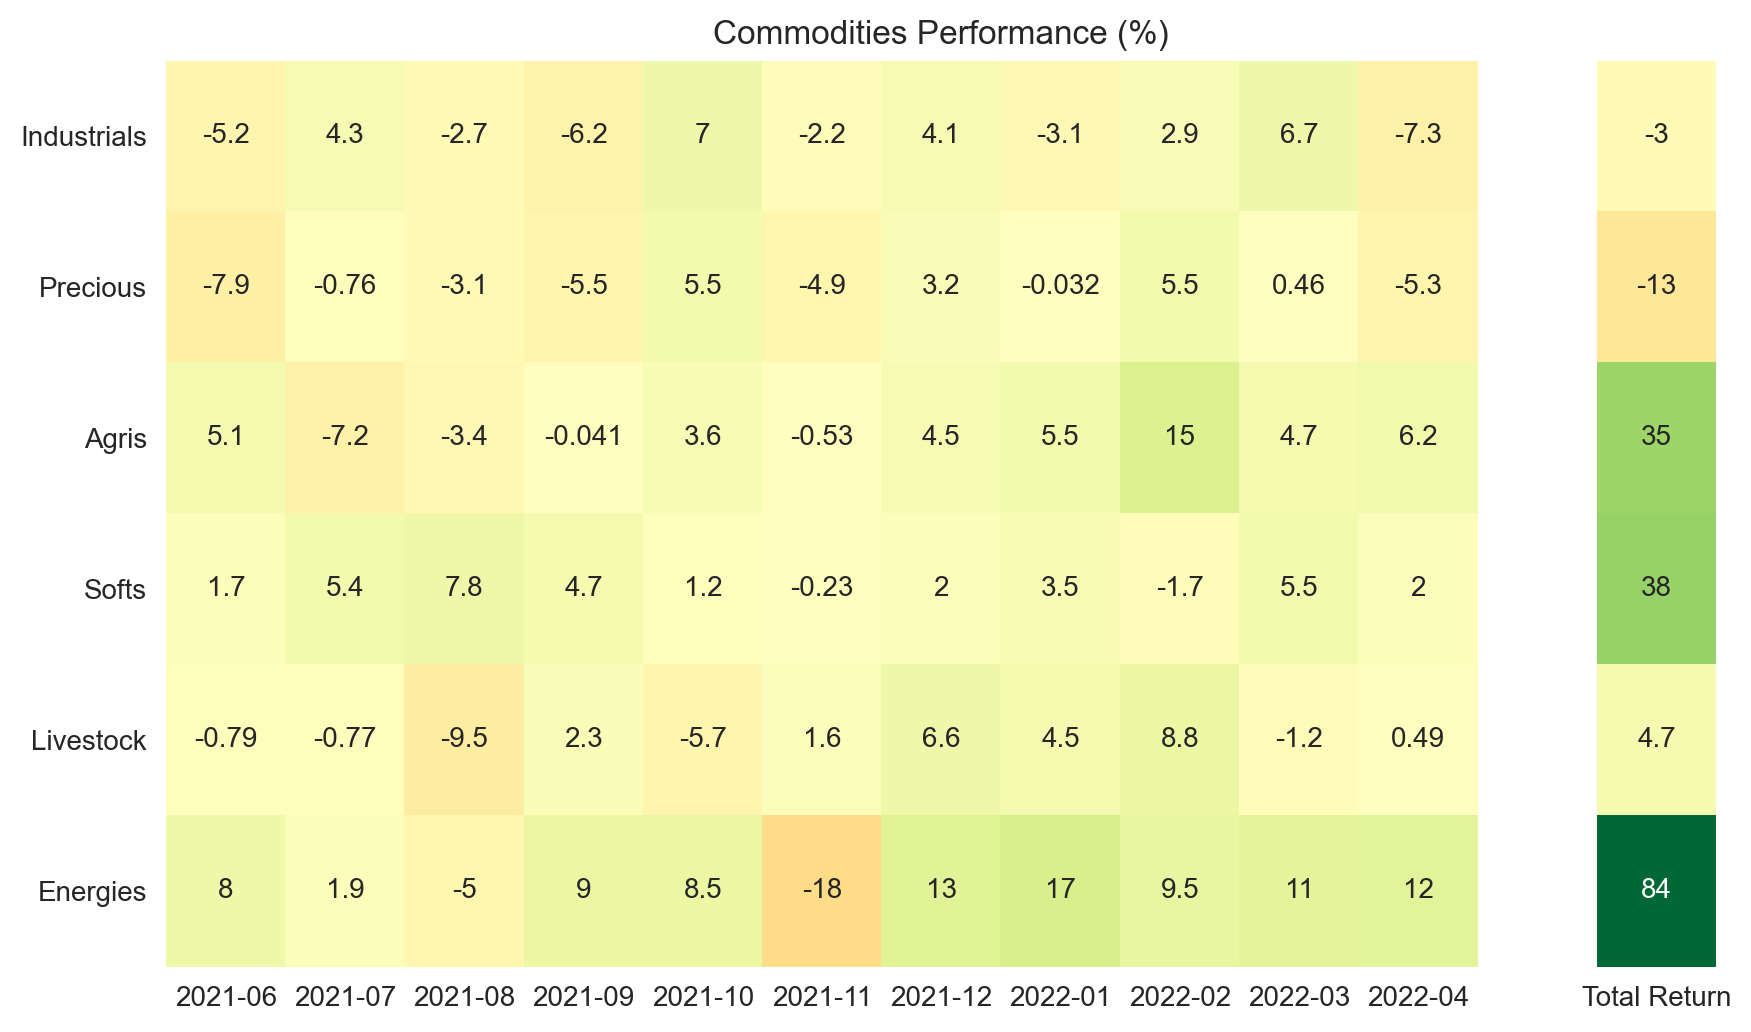

In [23]:
plt.figure(dpi=200, figsize=(10,6))
sns.heatmap(all_basket, annot=True, cmap=plt.get_cmap('RdYlGn'), center=0, cbar=False).set(title='Commodities Performance (%)')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

In [24]:
df_com_pct = df_com.pct_change()

basket_com = pd.DataFrame()
basket_com['Industrials'] = df_com_pct['Copper']
basket_com['Precious'] = (df_com_pct['Gold'] + df_com_pct['Silver'] + df_com_pct['Platinum']) / 3
basket_com['Agris'] = (df_com_pct['Wheat'] + df_com_pct['Corn'] + df_com_pct['Soybean']) / 3
basket_com['Softs'] = (df_com_pct['Cocoa'] + df_com_pct['Cotton'] + df_com_pct['Coffee'] + df_com_pct['Sugar']) / 4
basket_com['Livestock'] = (df_com_pct['Cattle'] + df_com_pct['Hogs']) / 2
basket_com['Energies'] = (df_com_pct['Brent'] + df_com_pct['WTI'] + df_com_pct['Heating oil']) / 3
basket_com = basket_com.dropna()
basket_com

,Industrials,Precious,Agris,Softs,Livestock,Energies
Date,,,,,,
2021-05-05,-0.000881,-0.007167,0.028105,0.029505,-0.000746,0.022806
2021-05-06,0.017625,0.025795,0.011466,0.020037,0.004700,-0.011042
2021-05-07,0.031825,0.002015,0.013068,0.002964,0.004962,0.005444
2021-05-10,-0.006819,0.004219,-0.024241,-0.005769,0.009146,0.001293
2021-05-11,0.009507,-0.004544,0.016470,0.002340,-0.000207,0.007120
...,...,...,...,...,...,...
2022-05-18,-0.013563,-0.010307,-0.023241,-0.023639,0.024490,-0.028242
2022-05-19,0.024629,0.020928,-0.001883,0.003632,-0.003770,0.028180
2022-05-20,-0.000933,-0.007311,-0.007822,-0.013022,0.017260,-0.000103


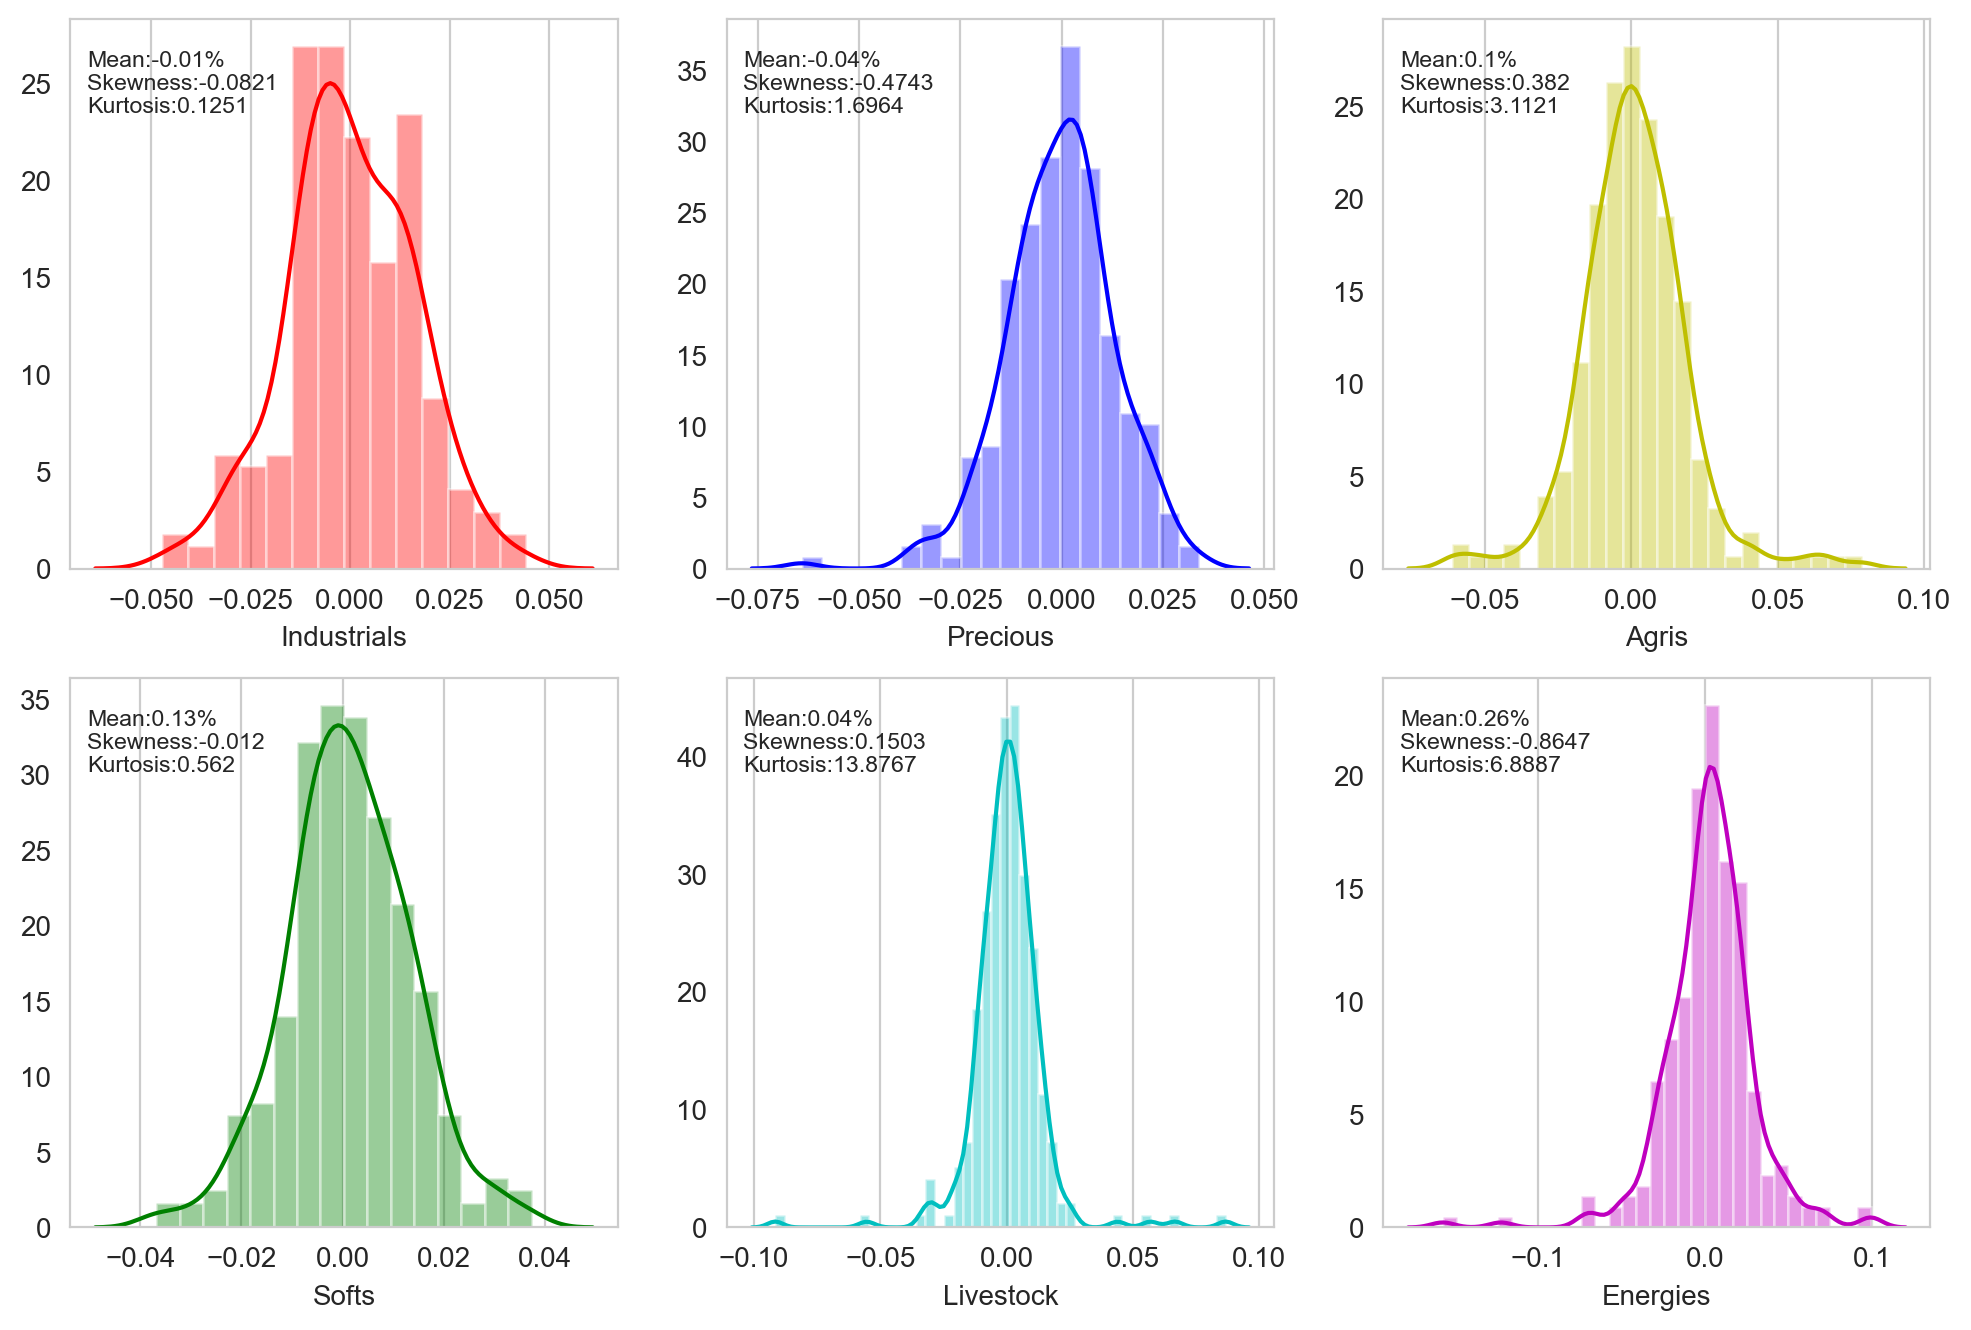

In [25]:
locate = [231,232,233,234,235,236]
color = ['r','b','y','g','c','m']
basket_list = basket_com.columns

plt.figure(dpi=200, figsize=(12,8))
for i in range(len(basket_list)):
    skew = round(basket_com[basket_list[i]].skew(),4)
    mean = round(basket_com[basket_list[i]].mean(),4)*100
    kurt = round(basket_com[basket_list[i]].kurt(),4)
    plt.subplot(locate[i])
    D_dist = sns.distplot(basket_com[basket_list[i]], color=color[i])
    D_dist.set_title(f'Mean:{mean}%\nSkewness:{skew}\nKurtosis:{kurt}', loc='left', x=0.03, y=0.8, fontsize='small')
    D_dist.grid(axis='y')
plt.show()


# Dynamic strategies


In [26]:
# SMB, HML, RMW, CMA
db = get_available_datasets()
factor_list = [dataset for dataset in db if '5' in dataset and 'F-F' in dataset]
df_5factors = web.DataReader(factor_list[0], 'famafrench', start='2021-05-01', end='2022-03-01')[0]
df_5factors = df_5factors[['SMB','HML','RMW','CMA']]
# display(df_5factors)

# MOM
factor_list = [dataset for dataset in db if 'Momentum' in dataset and 'F-F' in dataset]
df_mom = web.DataReader(factor_list[0], 'famafrench', start='2021-05-01', end='2022-03-01')[0]
# df_mom

# https://www.aqr.com/Insights/Datasets
# QMJ
df_QMJ = pd.read_excel(r"C:\Users\WEI CHIEH\OneDrive - UC Irvine\2021-2022 UCI MFin\22' SPRING\242_Portfolio Management\Final Project - Portfolio\Data\Quality Minus Junk Factors Monthly.xlsx")
df_QMJ.set_index('Date', inplace=True)
df_QMJ.index = pd.to_datetime(df_QMJ.index).strftime('%Y-%m')
df_QMJ.columns = ['QMJ']
df_QMJ = df_QMJ.iloc[-11:] * 100
df_QMJ_list = df_QMJ['QMJ'].tolist()
# display(df_QMJ)
# print(df_QMJ_list)

# BAB
df_BAB = pd.read_excel(r"C:\Users\WEI CHIEH\OneDrive - UC Irvine\2021-2022 UCI MFin\22' SPRING\242_Portfolio Management\Final Project - Portfolio\Data\Betting Against Beta Equity Factors Monthly.xlsx")
df_BAB.set_index('Date', inplace=True)
df_BAB.index = pd.to_datetime(df_BAB.index).strftime('%Y-%m')
df_BAB.columns = ['BAB']
df_BAB = df_BAB.iloc[-11:] * 100
df_BAB_list = df_BAB['BAB'].tolist()
# display(df_BAB)
# print(df_BAB_list)

# Merge
df_dynamic = df_5factors.merge(df_mom, left_index=True, right_index=True)
df_dynamic['QMJ'] = df_QMJ_list
df_dynamic['BAB'] = df_BAB_list
df_dynamic

,SMB,HML,RMW,CMA,Mom,QMJ,BAB
Date,,,,,,,
2021-05,1.19,7.04,2.34,3.09,0.88,1.684035,-0.733628
2021-06,-0.28,-7.82,-2.14,-1.04,2.19,-2.390484,0.271480
2021-07,-4.55,-1.74,5.37,-0.54,-2.28,6.707180,3.751456
2021-08,-0.78,-0.15,-0.26,-1.66,2.52,-0.376933,0.374163
2021-09,1.21,5.06,-1.94,2.02,1.50,-1.835579,-2.280680
2021-10,-2.71,-0.48,1.74,-1.51,3.19,2.131383,1.324006
2021-11,-1.73,-0.42,7.38,1.63,0.89,5.634435,0.562313
2021-12,-0.69,3.22,4.75,4.36,-2.60,4.185479,3.515169
2022-01,-3.95,12.74,0.73,7.73,-2.50,2.394686,-0.423499


In [27]:
# https://github.com/viniesposito/py-mlfactor/blob/main/py_mlfactor.ipynb
standard = [100]*len(df_dynamic.columns)
c_df_dynamic = df_dynamic/100
c_df_dynamic.iloc[0,:] = standard

for i in range(1,len(c_df_dynamic)):
    c_df_dynamic.iloc[i,:]= c_df_dynamic.iloc[i-1,:] * (1 + c_df_dynamic.iloc[i,:])

c_df_dynamic

,SMB,HML,RMW,CMA,Mom,QMJ,BAB
Date,,,,,,,
2021-05,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2021-06,99.720000,92.180000,97.860000,98.960000,102.190000,97.609516,100.271480
2021-07,95.182740,90.576068,103.115082,98.425616,99.860068,104.156361,104.033121
2021-08,94.440315,90.440204,102.846983,96.791751,102.376542,103.763761,104.422374
2021-09,95.583042,95.016478,100.851751,98.746944,103.912190,101.859096,102.040834
2021-10,92.992742,94.560399,102.606572,97.255865,107.226989,104.030103,103.391861
2021-11,91.383968,94.163245,110.178937,98.841136,108.181309,109.891612,103.973247
2021-12,90.753418,97.195302,115.412436,103.150609,105.368595,114.491102,107.628082
2022-01,87.168658,109.577983,116.254947,111.124152,102.734380,117.232804,107.172278


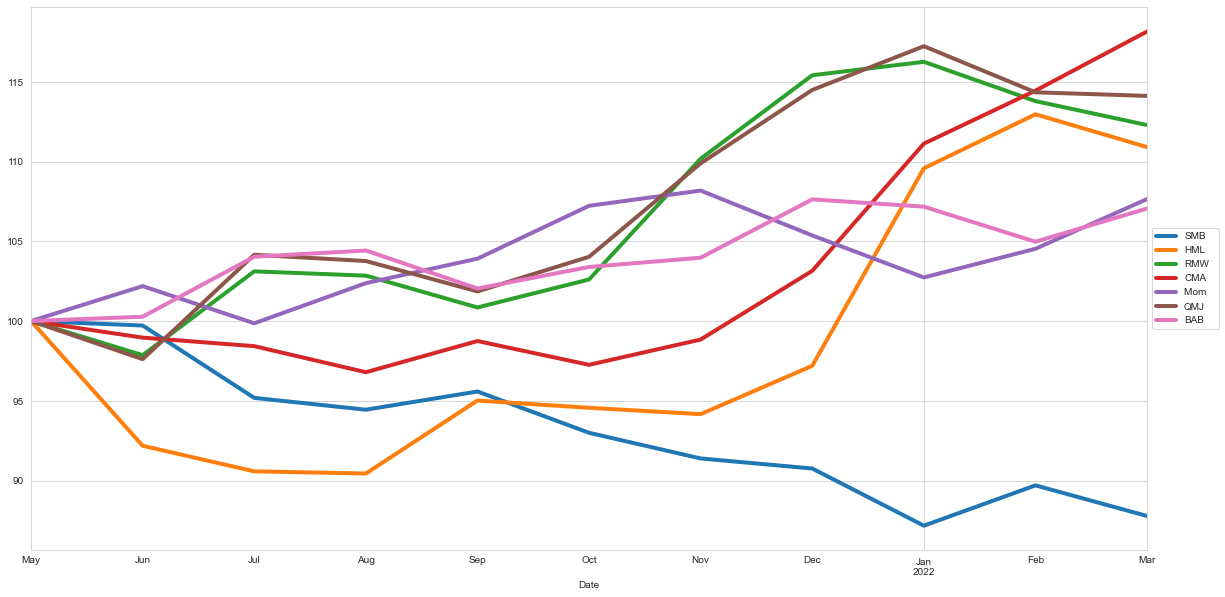

In [28]:
c_df_dynamic.plot(figsize=(20,10), linewidth=4)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [29]:
t_5factors = c_df_dynamic.pct_change(len(c_df_dynamic)-1)
t_5factors.dropna(how='any', inplace=True)
t_5factors.index = ['Total Return']
t_5factors = t_5factors.transpose() * 100
# display(t_5factors)

c_df_dynamic = c_df_dynamic.pct_change().dropna().transpose()
c_df_dynamic = c_df_dynamic*100
c_df_dynamic[' '] = np.full([1,len(c_df_dynamic)], np.nan)[0].tolist()
# display(c_df_5factors)

all_5factor = c_df_dynamic.merge(t_5factors, left_index=True, right_index=True)
all_5factor

,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,,Total Return
SMB,-0.280000,-4.550000,-0.780000,1.210000,-2.710000,-1.730000,-0.690000,-3.950000,2.900000,-2.140000,NaN,-12.222957
HML,-7.820000,-1.740000,-0.150000,5.060000,-0.480000,-0.420000,3.220000,12.740000,3.090000,-1.820000,NaN,10.907999
RMW,-2.140000,5.370000,-0.260000,-1.940000,1.740000,7.380000,4.750000,0.730000,-2.120000,-1.320000,NaN,12.288310
CMA,-1.040000,-0.540000,-1.660000,2.020000,-1.510000,1.630000,4.360000,7.730000,2.990000,3.240000,NaN,18.154839
Mom,2.190000,-2.280000,2.520000,1.500000,3.190000,0.890000,-2.600000,-2.500000,1.750000,2.980000,NaN,7.647292
QMJ,-2.390484,6.707180,-0.376933,-1.835579,2.131383,5.634435,4.185479,2.394686,-2.465586,-0.195714,NaN,14.118545
BAB,0.271480,3.751456,0.374163,-2.280680,1.324006,0.562313,3.515169,-0.423499,-2.051194,1.984356,NaN,7.057023


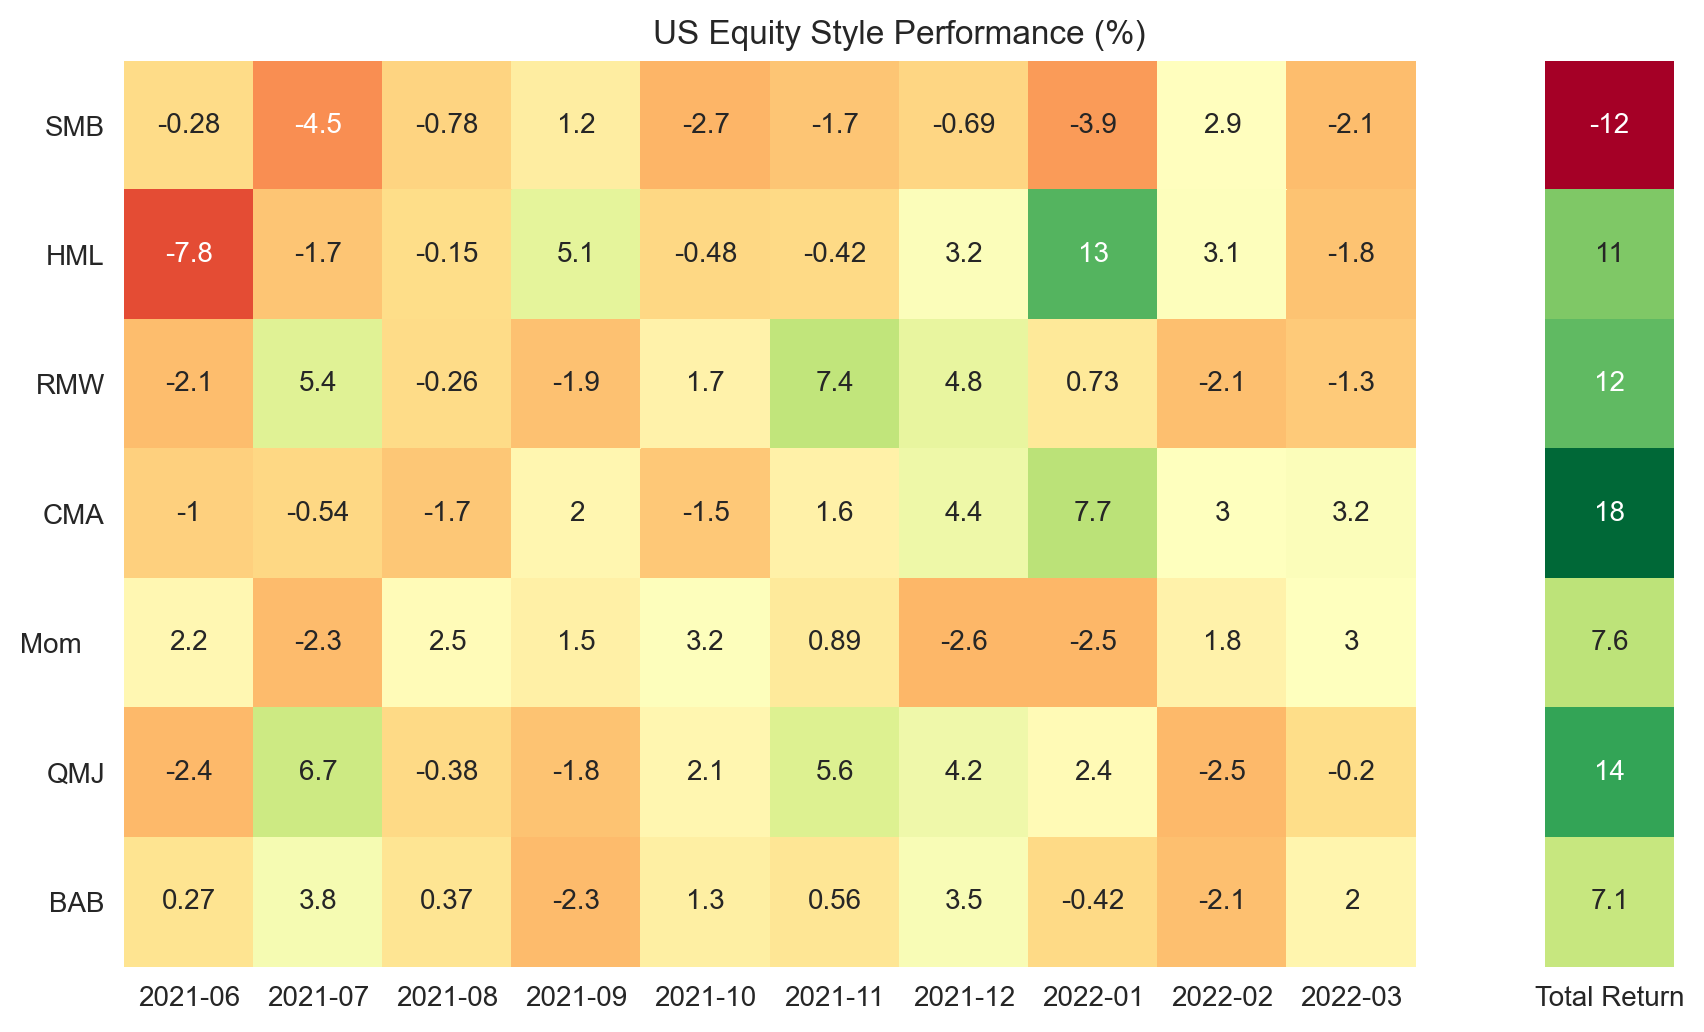

In [30]:
plt.figure(dpi=200, figsize=(10,6))
sns.heatmap(all_5factor, annot=True, cmap=plt.get_cmap('RdYlGn'), cbar=False).set(title='US Equity Style Performance (%)')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

# Commodities Trend

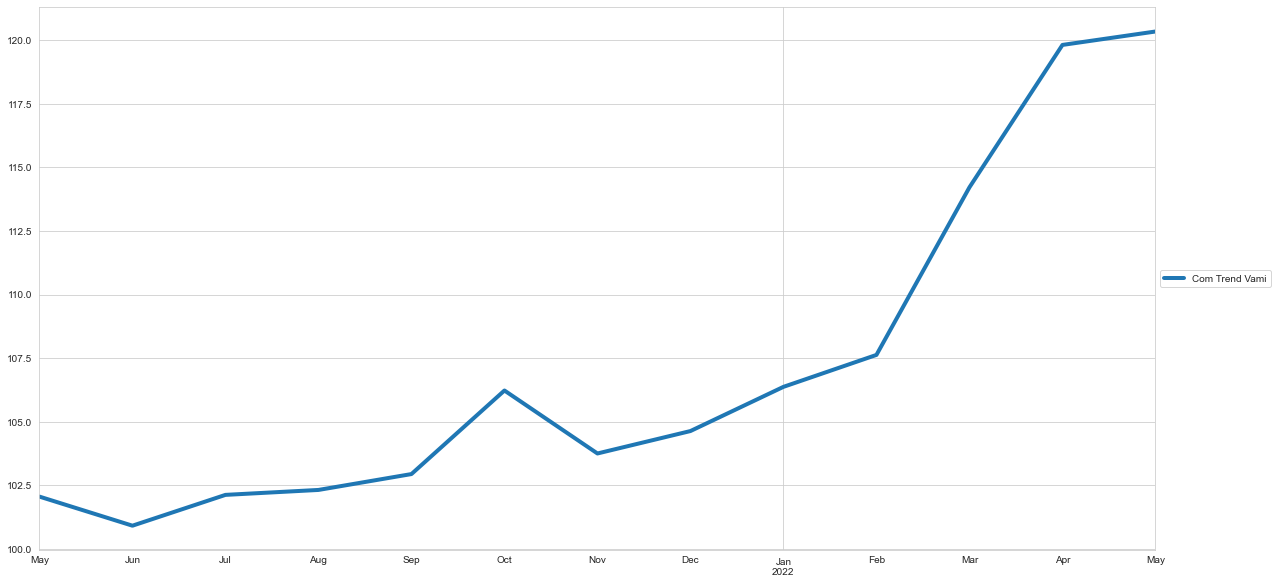

In [34]:
ROR = [2.060, -1.120, 1.200, 0.190, 0.610, 3.190, -2.330, 0.850, 1.660, 1.180, 6.120, 4.900, 0.440]
VAMI = [10358.8471, 10243.3356, 10366.7268, 10386.0504, 10449.2806, 10782.8844, 10531.7618, 10621.0501, 10797.1258, 10923.9921, 11592.8681, 12160.7911, 12209.4343]
df = pd.DataFrame(data={'ror': ROR, 'vami': VAMI}, index=pd.date_range(start='5/1/2021', periods=13, freq='M'))
df['ror'] = df['ror']/100
df['Com Trend Vami'] = df['ror']+1
df.iloc[0, 2] = df.iloc[0, 2]*100
for i in range(1, 13):
    df.iloc[i, 2] = df.iloc[i-1, 2]*df.iloc[i, 2]

df['Com Trend Vami'].plot(figsize=(20,10), linewidth=4)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [35]:
new = df.copy()
new = new.drop(['vami', 'Com Trend Vami'], axis=1)
index = ['May 2021', 'June 2021', 'July 2021', 'Aug 2021', 'Sept 2021', 'Oct 2021', 'Nov 2021', 'Dec 2021', 'Jan 2022', 'Feb 2022', 'Mar 2022', 'Apr 2022', 'May 2022']
new.index = index
new.loc['Total'] = ((1+new).prod()-1)
new = new.rename(columns={'ror': 'Commodities Performance %'})
new

,Commodities Performance %
May 2021,0.020600
June 2021,-0.011200
July 2021,0.012000
Aug 2021,0.001900
Sept 2021,0.006100
Oct 2021,0.031900
Nov 2021,-0.023300
Dec 2021,0.008500
Jan 2022,0.016600
Feb 2022,0.011800


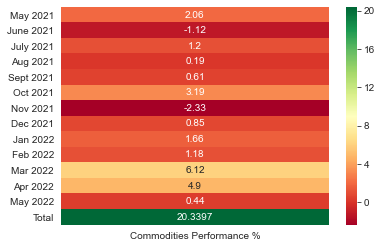

In [36]:
sns.heatmap(new*100, annot=True, fmt="g", cmap=plt.get_cmap('RdYlGn'))
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()